In [1]:
library(circlize)


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [12]:
mat

-5,3,4,1,-3,-1,0,1,3,-4
0,-4,-3,1,-3,4,-4,0,2,-2
0,5,0,1,-1,-2,-2,-5,1,0
-5,0,-2,3,-1,4,3,-4,0,5
0,3,0,-1,3,-2,-4,-3,2,-4
0,-4,-4,4,-1,3,2,0,-4,4
-4,1,1,1,1,-5,-1,0,4,5
-3,0,0,5,3,1,3,0,-4,0
4,3,0,-2,5,1,-3,4,5,1
-1,-5,1,0,4,2,4,-2,0,1


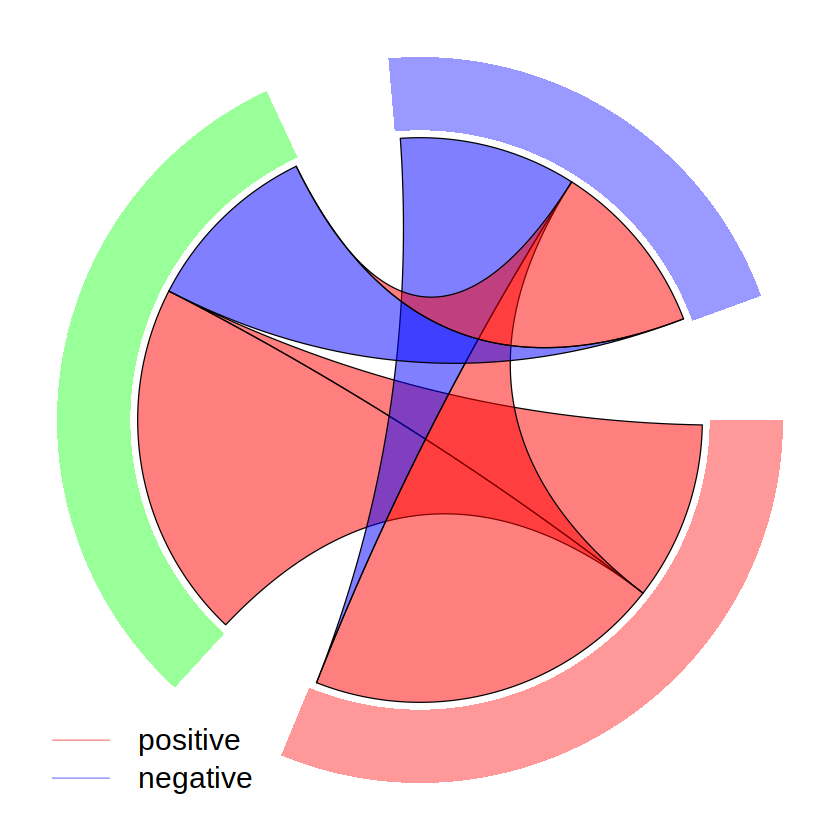

In [21]:
# create a matrix [0,1,2; 2,0,-1, -1,1,0]
mat = matrix(c(0,1,2, 2,0,-1, -1,1,0), nrow = 3, ncol = 3, byrow = TRUE)

# create a random matrix of size 10x10 that contains integers between -5 and 5 and 0 on the diagonal
# mat = matrix(sample(c(-5:5,0), 100, replace = TRUE), nrow = 10, ncol = 10)
# diag(mat) = 0

# create a vector of integers from 1 to the number of rows of the matrix
items = 1:nrow(mat)

# create a vector of cumulative sums of the absolute values of the rows of the matrix, starting with 0
v1 = c(0, cumsum(apply(mat, 1, function(x) sum(abs(x)))))


# create a data frame that contains, for each item, one row for the start of the arc
# and one row for the end of the arc, using the vector of cumulative sums to determine the start and end points
df = data.frame(
    factor = rep(items, each = 2),
    x = rep(v1, each = 2)[2:(2*length(v1)-1)]
    )

# Create an auxuliary data frame that contains, for each item, the start and end points of the arc
data_start_end = data.frame(
    factor = items,
    start = v1[1:length(v1)-1],
    end = v1[2:length(v1)]
    )



# Initialize the plot.
par(mar = c(1, 1, 1, 1) ) 
total_gap = 60
gap_degree = total_gap /nrow(mat)
circos.par(gap.degree = gap_degree)
circos.initialize(factors = df$factor, x = df$x)


# Create a vector of N distinct colors (N = number of rows of the matrix) using pastel colors
cols = rainbow(nrow(mat), s = 1, v = 1, alpha = 0.4)

# Build the regions of track #1
circos.trackPlotRegion(factors = df$factor, ylim = c(0,1) ,bg.col = cols, bg.border = NA, 
    )



for (i in 1:nrow(mat)){
    i0 = data_start_end$start[i] # start of the arc at the source


    for (j in i:ncol(mat)) {
        if (i == j) next # skip the diagonal
        # print the source and target
        j0 = data_start_end$start[j] # start of the arc at the target
        width_ij = abs(mat[i,j])
        width_ji = abs(mat[j,i])
        # color is red for positive values, blue for negative values, with some transparency
        col_ij = ifelse(mat[i,j] > 0, rgb(1,0,0,0.5), rgb(0,0,1,0.5))
        col_ji = ifelse(mat[j,i] > 0, rgb(1,0,0,0.5), rgb(0,0,1,0.5))

        # draw the arc if the value is not 0
        if (width_ij > 0) circos.link(i, c(i0, i0+width_ij), j, c(j0+width_ji, j0+width_ji), col = col_ij, lwd = 1, lty = 1, border="black" )
        if (width_ji > 0) circos.link(i, c(i0+width_ij, i0+width_ij), j, c(j0, j0+width_ji), col = col_ji, lwd = 1, lty = 1, border="black" )
        
        # update the start of the arc at the target
        data_start_end$start[j] = j0 + width_ji
        i0 = i0 + width_ij
    }
    data_start_end$start[i] = i0
}

legend("bottomleft", legend = c("positive", "negative"), col = c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)), lty = 1, lwd = 1, bty = "n", cex = 1.5)
circos.clear()
